In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv("SpotifyFeatures.csv")

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [6]:
heatdf = df.drop(columns=['track_name','track_id','artist_name'])

In [7]:
heatdf

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


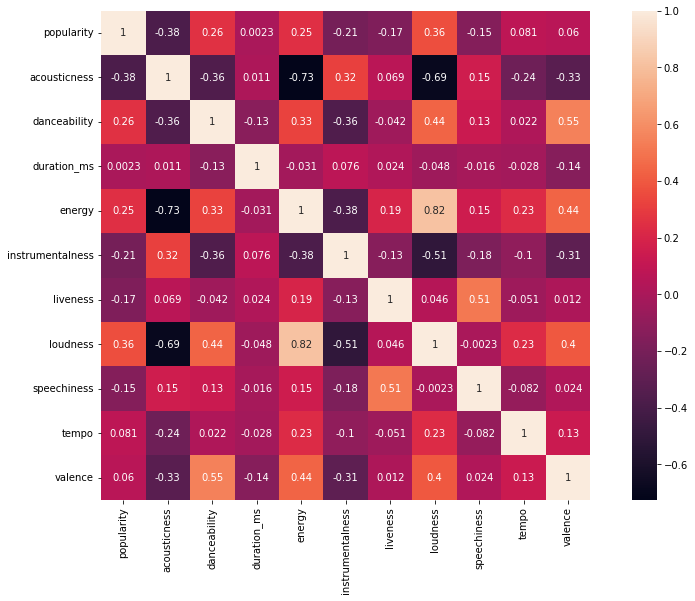

In [8]:
plt.subplots(figsize=(15,9))
sns.heatmap(heatdf.corr(), annot=True, square=True)
plt.show()

In [9]:
#acousticness is coerelated to energy and loudness and vice versa also instrumentalness is coerelated to loudness

In [10]:
df.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [11]:
df.genre.unique()
df.genre=df.genre.map({'Alternative':0,'Anime':1,'Blues':2,"Children's Music":3,'Soul':4,'Movie':5,'R&B':6,'A Capella':7,'Country':8,'Dance':9,'Electronic':10,'Folk':11,'Opera':13,'Hip-Hop':14,'Children’s Music':3,'Rap':15,'Indie':16,'Classical':17,'Pop':18,'Reggae':19,'Reggaeton':20,'Jazz':21,'Rock':22,'Ska':23,'Comedy':24,'Soundtrack':25,'World':26})
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,5,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,5,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,5,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,5,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,4,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,4,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,4,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,4,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [12]:
def normalize(col):
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)


In [13]:

num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf= df.select_dtypes(include=num_types)

In [14]:


for col in numdf.columns:
    normalize(col)


In [15]:
numdf

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,5,0,0.61100,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,5,1,0.24600,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,5,3,0.95200,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,5,0,0.70300,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,5,4,0.95000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...
232720,4,39,0.00384,0.687,326240,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,4,38,0.03290,0.785,282447,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,4,47,0.90100,0.517,166960,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,4,44,0.26200,0.745,222442,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


In [16]:
df.genre.unique()

array([0.19230769, 0.23076923, 0.26923077, 0.        , 0.30769231,
       0.34615385, 0.38461538, 0.03846154, 0.42307692, 0.07692308,
       0.5       , 0.53846154, 0.11538462, 0.57692308, 0.61538462,
       0.65384615, 0.69230769, 0.73076923, 0.76923077, 0.80769231,
       0.84615385, 0.88461538, 0.92307692, 0.15384615, 0.96153846,
       1.        ])

In [17]:
numdf.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,5,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,5,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,5,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,5,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,5,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
k=11
k=12
k=13
k=14
k=15
k=16
k=17
k=18
k=19
k=20
k=21
k=22
k=23
k=24
k=25


c:\users\91842\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


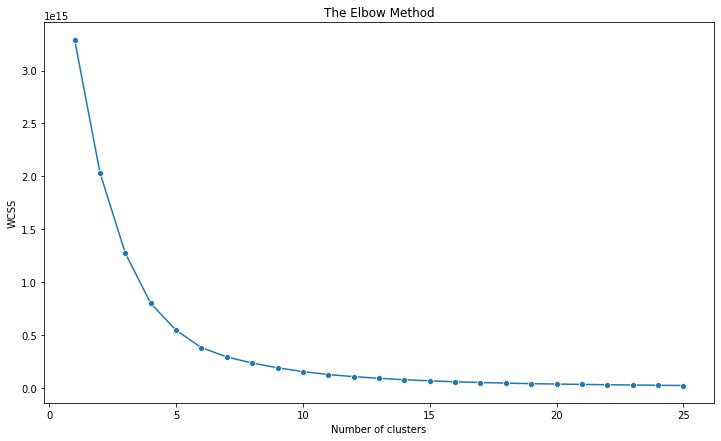

In [18]:
from sklearn.cluster import KMeans

clust = 25

wcss = []

for i in range(1, clust+1):
    print(f'k={i}')
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state =0)
    kmeans.fit(numdf)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,7))
sns.lineplot(range(1, clust+1), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:

kmns = KMeans(n_clusters=11)
label= kmns.fit_predict(numdf)
df['label'] = label

In [20]:
normalize('label')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.192308,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,C#,0.339614,0.900856,Major,0.032070,0.642704,4/4,0.814,0.9
1,0.192308,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,F#,0.142710,0.834469,Minor,0.068374,0.675801,4/4,0.816,0.0
2,0.192308,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,C,0.094241,0.686429,Minor,0.014818,0.325182,5/4,0.368,0.0
3,0.192308,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,C#,0.089697,0.716695,Major,0.018311,0.665238,4/4,0.227,0.0
4,0.192308,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,F,0.194208,0.557054,Major,0.024767,0.518516,4/4,0.390,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0.153846,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,0.39,0.003855,0.676000,0.056136,0.714709,0.544545,D,0.075561,0.744311,Major,0.009949,0.400722,4/4,0.962,0.7
232721,0.153846,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.38,0.033032,0.781139,0.048227,0.683677,0.000881,E,0.229550,0.809825,Minor,0.012172,0.392666,4/4,0.969,0.2
232722,0.153846,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,0.47,0.904618,0.493617,0.027372,0.419408,0.000000,D,0.085658,0.786018,Major,0.133150,0.252941,4/4,0.813,0.0
232723,0.153846,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,0.44,0.263052,0.738226,0.037391,0.704699,0.000000,A,0.326487,0.806391,Major,0.131033,0.327737,4/4,0.489,0.5


In [21]:
for j in range(len(df.track_name)):
    df.track_name[j]=df.track_name[j].lower()

C:\Users\91842\AppData\Local\Temp\ipykernel_10892\2433904695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.track_name[j]=df.track_name[j].lower()


In [22]:
for j in range(len(df.artist_name)):
    df.artist_name[j]=df.artist_name[j].lower()

C:\Users\91842\AppData\Local\Temp\ipykernel_10892\1170088298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.artist_name[j]=df.artist_name[j].lower()


In [23]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.192308,henri salvador,c'est beau de faire un show,0BRjO6ga9RKCKjfDqeFgWV,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,C#,0.339614,0.900856,Major,0.032070,0.642704,4/4,0.814,0.9
1,0.192308,martin & les fées,perdu d'avance (par gad elmaleh),0BjC1NfoEOOusryehmNudP,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,F#,0.142710,0.834469,Minor,0.068374,0.675801,4/4,0.816,0.0
2,0.192308,joseph williams,don't let me be lonely tonight,0CoSDzoNIKCRs124s9uTVy,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,C,0.094241,0.686429,Minor,0.014818,0.325182,5/4,0.368,0.0
3,0.192308,henri salvador,dis-moi monsieur gordon cooper,0Gc6TVm52BwZD07Ki6tIvf,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,C#,0.089697,0.716695,Major,0.018311,0.665238,4/4,0.227,0.0
4,0.192308,fabien nataf,ouverture,0IuslXpMROHdEPvSl1fTQK,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,F,0.194208,0.557054,Major,0.024767,0.518516,4/4,0.390,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0.153846,slave,son of slide,2XGLdVl7lGeq8ksM6Al7jT,0.39,0.003855,0.676000,0.056136,0.714709,0.544545,D,0.075561,0.744311,Major,0.009949,0.400722,4/4,0.962,0.7
232721,0.153846,jr thomas & the volcanos,burning fire,1qWZdkBl4UVPj9lK6HuuFM,0.38,0.033032,0.781139,0.048227,0.683677,0.000881,E,0.229550,0.809825,Minor,0.012172,0.392666,4/4,0.969,0.2
232722,0.153846,muddy waters,(i'm your) hoochie coochie man,2ziWXUmQLrXTiYjCg2fZ2t,0.47,0.904618,0.493617,0.027372,0.419408,0.000000,D,0.085658,0.786018,Major,0.133150,0.252941,4/4,0.813,0.0
232723,0.153846,r.lum.r,with my words,6EFsue2YbIG4Qkq8Zr9Rir,0.44,0.263052,0.738226,0.037391,0.704699,0.000000,A,0.326487,0.806391,Major,0.131033,0.327737,4/4,0.489,0.5


In [24]:
fdf=df.to_pickle("df.csv" + '.pkl')

In [25]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.192308,henri salvador,c'est beau de faire un show,0BRjO6ga9RKCKjfDqeFgWV,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,C#,0.339614,0.900856,Major,0.032070,0.642704,4/4,0.814,0.9
1,0.192308,martin & les fées,perdu d'avance (par gad elmaleh),0BjC1NfoEOOusryehmNudP,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,F#,0.142710,0.834469,Minor,0.068374,0.675801,4/4,0.816,0.0
2,0.192308,joseph williams,don't let me be lonely tonight,0CoSDzoNIKCRs124s9uTVy,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,C,0.094241,0.686429,Minor,0.014818,0.325182,5/4,0.368,0.0
3,0.192308,henri salvador,dis-moi monsieur gordon cooper,0Gc6TVm52BwZD07Ki6tIvf,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,C#,0.089697,0.716695,Major,0.018311,0.665238,4/4,0.227,0.0
4,0.192308,fabien nataf,ouverture,0IuslXpMROHdEPvSl1fTQK,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,F,0.194208,0.557054,Major,0.024767,0.518516,4/4,0.390,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0.153846,slave,son of slide,2XGLdVl7lGeq8ksM6Al7jT,0.39,0.003855,0.676000,0.056136,0.714709,0.544545,D,0.075561,0.744311,Major,0.009949,0.400722,4/4,0.962,0.7
232721,0.153846,jr thomas & the volcanos,burning fire,1qWZdkBl4UVPj9lK6HuuFM,0.38,0.033032,0.781139,0.048227,0.683677,0.000881,E,0.229550,0.809825,Minor,0.012172,0.392666,4/4,0.969,0.2
232722,0.153846,muddy waters,(i'm your) hoochie coochie man,2ziWXUmQLrXTiYjCg2fZ2t,0.47,0.904618,0.493617,0.027372,0.419408,0.000000,D,0.085658,0.786018,Major,0.133150,0.252941,4/4,0.813,0.0
232723,0.153846,r.lum.r,with my words,6EFsue2YbIG4Qkq8Zr9Rir,0.44,0.263052,0.738226,0.037391,0.704699,0.000000,A,0.326487,0.806391,Major,0.131033,0.327737,4/4,0.489,0.5


In [26]:
df.popularity.sort_values().unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [27]:
df=df[df.popularity>0.3]

In [28]:
from tqdm import tqdm
def recomends(name,artist):
    name=name.casefold()
    artist=artist.casefold()
    dist=[]
    songs=df[df.track_name==name]
    songs=songs[songs.artist_name==artist].head(1).values[0]
    dropsong=df[df.track_name!=name]
    for r_song in tqdm(dropsong.values):
        distance = 0
        for i in np.arange(len(dropsong.columns)):
            if not i in[0,1,2,3,10,13,16]:
                distance = distance + np.absolute(float(songs[i]) - float(r_song[i]))
        dist.append(distance)
    dropsong['distance'] = dist
        #sorting our data to be ascending by 'distance' feature
    dropsong = dropsong.sort_values('distance')
    columns = ['artist_name', 'track_name']
    return dropsong[columns]

In [50]:
result=recomends("shape of you",'ed sheeran').reset_index()

100%|███████████████████████████████████████████████████████████████████████| 168528/168528 [00:05<00:00, 31151.62it/s]
C:\Users\91842\AppData\Local\Temp\ipykernel_10892\1630270781.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropsong['distance'] = dist


In [51]:
result=result.drop('index',axis=1).drop_duplicates()

In [52]:
result=result.head(8)
result

,artist_name,track_name
0,dodie,monster
1,hot chocolate,you sexy thing
3,nsg,options
4,luny tunes,métele sazón
5,prince royce,la carretera
7,tony dize,quizas - remix
10,ne-yo,because of you
14,wizkid,fever


In [53]:
df[df.artist_name=='Coolio']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label


In [33]:
df[df.track_name=="If I Were a Boy"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label


In [34]:
t=df[df.track_name=='dive']
t[t.artist_name=='Ed Sheeran']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label


In [35]:
s1='Ed Sheeran'
s1.casefold()=='Ed sheeran'

False